In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import math
from scipy.stats import multivariate_normal
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn import tree
from imblearn.combine import SMOTETomek
import pydotplus
from scipy.io import arff
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

In [ ]:
def removeOutliers(data, col, original):
	Q3 = np.quantile(data[col], 0.75)
	Q1 = np.quantile(data[col], 0.25)
	IQR = Q3 - Q1

	# print("IQR value for column %s is: %s" % (col, IQR))
	global outlier_free_list
	global outlier_list
	global outlier_inst
	global filtered_data
	global classify_df
	lower_range = Q1 - 1.5 * IQR
	upper_range = Q3 + 1.5 * IQR
	classify_df = original.copy()
	classify_df['outlier'] = 0
	for i in range(data.shape[0]):
		if data['score'][i] <= lower_range or data['score'][i] >= upper_range:
			classify_df['outlier'][i] = 1
	outlier_free_list = [x for x in data[col] if (
		(x > lower_range) & (x < upper_range))]
	outlier_list = [x for x in data[col] if (
		(x <= lower_range) | (x >= upper_range))]
	filtered_data = original.loc[data[col].isin(outlier_free_list)]
	outlier_inst = original.loc[data[col].isin(outlier_list)]

In [ ]:
def MapFunc(df, str_ar):
  for i in range(len(str_ar)):
    uni = df[str_ar[i]].unique()
    mylist = range(0,len(uni))
    d = dict(zip(uni,mylist))
    df[str_ar[i]] = [d[item] for item in df[str_ar[i]]]
  return df

In [ ]:
def MissingValuesHandler(df, categ, cont):
  for s in categ:
    mode = df[s].mode()[0]
    df[s] = df[s].replace("?", mode)
  for s in cont:
    temp = df[s].copy()
    temp = temp.replace("?", 0)
    temp = temp.replace('nan', 0)
    median = temp.median()
    df[s] = df[s].replace('?',median)
    df[s] = df[s].replace('nan',median)
  return df

In [ ]:
def oneHotFunc(df, categ):
  for i in range(len(categ)):
    one_hot = pd.get_dummies(df[categ[i]])
    names = df[categ[i]].unique()
    temp = []
    for j in range(len(names)):
      temp.append(categ[i] +'_'+ str(names[j]))
    one_hot.columns = temp
    df = df.drop(categ[i],axis = 1)
    df= df.join(one_hot)
  print(df.head())
  return df

Removal of Outliers using IQR
--------------------------------

Cylinder Bands
------------------

In [ ]:
colnames = ['timestamp', 'cylinder_number', 'customer', 'job_number', 'grain_screened', 'ink_color',
'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type',
'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank',
'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humifity', 'roughness', 'blade_pressure', 'varnish_pct',
'press_speed', 'ink_pct', 'solvent_pct', 'ESA_Voltage', 'ESA_Amperage', 'wax', 'hardener', 'roller_durometer',
'current_density', 'anode_space_ratio', 'chrome_content', 'target']
df = pd.read_csv("drive/MyDrive/Datasets/bands.data",names=colnames, header=None)
# df = df.drop('timestamp',1)
df.head()

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,target
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


* 'grain_screened': 49
* 'proof_on_ctd_ink': 57
* 'blade_mfg': 60
* 'direct_steam':25
* 'solvent_type': 55,
* 'type_on_cylinder': 18
* 'cylinder_size': 3
* 'paper_mill_location': 156
* 'plating_tank': 18
* 'proof_cut': 55
* 'viscosity': 5
* 'caliper': 27
* 'ink_temperature': 2
* 'humifity': 1
* 'roughness': 30
* 'blade_pressure': 63
* 'varnish_pct': 56,
* 'press_speed': 10,
* 'ink_pct': 56,
* 'solvent_pct': 56
* 'ESA_Voltage': 57
* 'ESA_Amperage':55
* 'wax': 6
* 'hardener': 7
* 'roller_durometer': 55
* 'current_density': 7
* 'anode_space_ratio': 7
* 'chrome_content': 3

In [ ]:
i=0
while i < (len(colnames)):
  print(df[colnames[i]].value_counts())
  print('-----------------------')
  i = i+ 1

19900710    9
19900606    8
19901209    8
19900507    7
19900723    6
           ..
19900718    1
19900806    1
19900801    1
19900804    1
19900830    1
Name: timestamp, Length: 296, dtype: int64
-----------------------
X129    5
M254    5
R6      4
R15     4
F601    4
       ..
R4      1
T313    1
X203    1
F329    1
j70     1
Name: cylinder_number, Length: 434, dtype: int64
-----------------------
MODMAT         61
KMART          54
TARGET         40
TVGUIDE        38
WARDS          33
               ..
KIDSRUS         1
ADCO            1
NTLWILDLIFE     1
GALLS           1
GLOBAL          1
Name: customer, Length: 83, dtype: int64
-----------------------
47103    12
47105    10
47203     9
47202     9
36197     7
         ..
25517     1
25477     1
25466     1
36059     1
25433     1
Name: job_number, Length: 262, dtype: int64
-----------------------
NO     281
YES    210
?       49
Name: grain_screened, dtype: int64
-----------------------
KEY    495
key     38
KeY      7
Name: in

cylinder number: nominal

customer: nominal;

job number: nominal;

grain screened: nominal; yes, no

ink color: nominal;  key, type

proof on ctd ink:  nominal;  yes, no  

blade mfg: nominal;  benton, daetwyler, uddeholm

cylinder division: nominal;  gallatin, warsaw, mattoon

paper type: nominal;  uncoated, coated, super

ink type: nominal;  uncoated, coated, cover

direct steam: nominal; use; yes, no *

solvent type: nominal;  xylol, lactol, naptha, line, other

type on cylinder:  nominal;  yes, no  

press type: nominal; use; 70 wood hoe, 70 motter, 70 albert, 94 motter

press: nominal;  821, 802, 813, 824, 815, 816, 827, 828

unit number: nominal;  1, 2, 3, 4, 5, 6, 7, 8, 9, 10

cylinder size: nominal;  catalog, spiegel, tabloid

paper mill location: nominal; north us, south us, canadian, scandanavian, mid european

plating tank: nominal; 1910, 1911, other

band type: nominal; class; band, no band *

In [ ]:
str_ar = ['cylinder_number', 'customer', 'job_number', 'ink_color', 'cylinder_division', 'paper_type', 'ink_type',
          'press_type', 'press', 'unit_number','target']
df = MapFunc(df, str_ar)
df = df.drop('timestamp',1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,target
0,0,0,0,YES,0,YES,BENTON,0,0,0,...,36.4,0,0,2.5,1,34,40,105,100,0
1,1,0,0,YES,0,YES,BENTON,0,0,0,...,38.5,0,0,2.5,0.7,34,40,105,100,1
2,2,1,1,YES,0,YES,BENTON,0,0,1,...,39.8,0,0,2.8,0.9,40,40,103.87,100,1
3,3,2,2,YES,0,YES,BENTON,0,0,0,...,38.8,0,0,2.5,1.3,40,40,108.06,100,1
4,4,3,3,NO,0,YES,BENTON,0,0,1,...,42.5,5,0,2.3,0.6,35,40,106.67,100,1


In [ ]:
str_ar = ['grain_screened', 'proof_on_ctd_ink', 'blade_mfg', 'direct_steam', 'solvent_type',
'type_on_cylinder', 'cylinder_size', 'paper_mill_location', 'plating_tank']
for i in range(len(str_ar)):
    uni = list(df[str_ar[i]].unique())
    uni.remove('?')
    mylist = range(0,len(uni))
    d = dict(zip(uni,mylist))
    d['?'] = np.nan
    print(d)
    print('-------------------------')
    df[str_ar[i]] = [d[item] for item in df[str_ar[i]]]
    df[str_ar[i]] = df[str_ar[i]].replace('?',np.nan)
for i in range(len(df.columns)):
  df[df.columns[i]] = df[df.columns[i]].replace('?',np.nan)

df.head()

{'YES': 0, 'NO': 1, '?': nan}
-------------------------
{'YES': 0, 'NO': 1, '?': nan}
-------------------------
{'BENTON': 0, 'UDDEHOLM': 1, '?': nan}
-------------------------
{'NO': 0, 'YES': 1, 'no': 2, '?': nan}
-------------------------
{'LINE': 0, 'XYLOL': 1, 'NAPTHA': 2, '?': nan}
-------------------------
{'YES': 0, 'NO': 1, 'no': 2, 'yes': 3, '?': nan}
-------------------------
{'TABLOID': 0, 'CATALOG': 1, 'SPIEGEL': 2, 'catalog': 3, 'tabloid': 4, 'spiegel': 5, '?': nan}
-------------------------
{'NorthUS': 0, 'CANADIAN': 1, 'CANAdiAN': 2, 'SCANDANAVIAN': 3, 'SouthUS': 4, 'mideuropean': 5, '?': nan}
-------------------------
{'1911': 0, '1910': 1, '?': nan}
-------------------------


,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,target
0,0,0,0,0.0,0,0.0,0.0,0,0,0,...,36.4,0,0,2.5,1,34,40,105,100,0
1,1,0,0,0.0,0,0.0,0.0,0,0,0,...,38.5,0,0,2.5,0.7,34,40,105,100,1
2,2,1,1,0.0,0,0.0,0.0,0,0,1,...,39.8,0,0,2.8,0.9,40,40,103.87,100,1
3,3,2,2,0.0,0,0.0,0.0,0,0,0,...,38.8,0,0,2.5,1.3,40,40,108.06,100,1
4,4,3,3,1.0,0,0.0,0.0,0,0,1,...,42.5,5,0,2.3,0.6,35,40,106.67,100,1


In [ ]:
# categ = ['cylinder_number', 'customer', 'job_number', 'grain_screened', 'ink_color',
# 'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type',
# 'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank']
# cont = ['proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humifity', 'roughness', 'blade_pressure', 'varnish_pct',
# 'press_speed', 'ink_pct', 'solvent_pct', 'ESA_Voltage', 'ESA_Amperage', 'wax', 'hardener', 'roller_durometer',
# 'current_density', 'anode_space_ratio', 'chrome_content']
# df = MissingValuesHandler(df, categ, cont)

# str_ar = ['cylinder_number', 'customer', 'job_number', 'grain_screened', 'ink_color',
# 'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type',
# 'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank']
# str_ar.append('target')
# df = MapFunc(df, str_ar)
# df.head()

In [ ]:
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
df = df.astype(float)
std_dev=df.std()
avg=df.mean()
for i in str_ar:
    std_dev[i]=1
    avg[i]=0
df= (df- avg)/std_dev

In [ ]:
categ = ['cylinder_number', 'customer', 'job_number', 'grain_screened', 'ink_color',
'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type',
'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank']
for j in range(len(categ)):
    data_crosstab = pd.crosstab(df.target,df[categ[j]], margins = False)
    total=data_crosstab.sum(axis=0)
    data_crosstab = data_crosstab/total
    print(data_crosstab)
    print()
    df[categ[j]] = [data_crosstab[df[categ[j]][i]][df['target'][i]] for i in range(len(df))]
df['score']=df.sum(axis=1)

cylinder_number  -1.642140  -1.634133  -1.626126  -1.618120  -1.610113  \
target                                                                   
-1.168712              1.0        0.0        0.0        0.0        0.0   
 0.854059              0.0        1.0        1.0        1.0        1.0   

cylinder_number  -1.602106  -1.594099  -1.586092  -1.578085  -1.570078  ...  \
target                                                                  ...   
-1.168712              0.0        0.5        0.0        1.0        0.0  ...   
 0.854059              1.0        0.5        1.0        0.0        1.0  ...   

cylinder_number   1.752784   1.760791   1.768797   1.776804   1.784811  \
target                                                                   
-1.168712              1.0        1.0        1.0        1.0        1.0   
 0.854059              0.0        0.0        0.0        0.0        0.0   

cylinder_number   1.792818   1.800825   1.808832   1.816839   1.824846  
target          

In [ ]:
colnames = ['timestamp', 'cylinder_number', 'customer', 'job_number', 'grain_screened', 'ink_color',
'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type',
'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank',
'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humifity', 'roughness', 'blade_pressure', 'varnish_pct',
'press_speed', 'ink_pct', 'solvent_pct', 'ESA_Voltage', 'ESA_Amperage', 'wax', 'hardener', 'roller_durometer',
'current_density', 'anode_space_ratio', 'chrome_content', 'target']
original = pd.read_csv("drive/MyDrive/Datasets/bands.data",names=colnames, header=None)
original.head()

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,target
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


In [ ]:
removeOutliers(df, 'score' ,original)
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)
print(df.shape)
# outlier_inst = outlier_inst.drop['target',1]
print(outlier_inst)

Shape of data after outlier removal is:  (529, 40)
(540, 40)
     timestamp cylinder_number   customer  job_number grain_screened  \
188   19900425            G496   BURDINES       34664            YES   
245   19900710             M39     MODMAT       47104            YES   
296   19900818            X132    LAZARUS       34154            YES   
322   19900924              R6     TARGET       34551             NO   
323   19901002             G55      KMART       36197             NO   
339   19901001            G150      KMART       36197             NO   
366   19901109             G81      HILLS       34716             NO   
367   19901108            G462  WOOLWORTH       34997             NO   
385   19901124            W395    TOYSRUS       34259             NO   
478   19920205              X7  COLORTILE       34272            YES   
493   19920515             X13    TOYSRUS       34156             NO   

    ink_color proof_on_ctd_ink blade_mfg cylinder_division paper_type  ...

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data.to_csv('drive/MyDrive/Modified_Datasets/IQRAfterRemovingOutliers/band.csv', index = False)

In [ ]:
classify_df = classify_df.drop('target',1)
classify_df.to_csv('drive/MyDrive/Modified_Datasets/IQROutlier_Classification/band.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Credit
------------------

In [ ]:
colnames = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','target']
df = pd.read_csv("drive/MyDrive/Datasets/creditapproval.data",names=colnames, header=None)
print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
i=0
while i < (len(colnames)):
  print(df[colnames[i]].value_counts())
  print('-----------------------')
  i = i+ 1
  # print(df[colnames[i]].value_counts()['?'])
  # print(df[colnames[i]].value_counts()['nan'])

b    468
a    210
?     12
Name: A1, dtype: int64
-----------------------
?        12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: A2, Length: 350, dtype: int64
-----------------------
1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: A3, Length: 215, dtype: int64
-----------------------
u    519
y    163
?      6
l      2
Name: A4, dtype: int64
-----------------------
g     519
p     163
?       6
gg      2
Name: A5, dtype: int64
-----------------------
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64
-----------------------
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64
-----------------------
0.000    70
0.250

* A1: 12 (categ)
* A2: 12 (num)
* A4: 6 (categ)
* A5: 6 (categ)
* A6: 9 (categ)
* A7: 9 (categ)
* A14: 13 (num)

In [ ]:
df1 = df.copy()
str_ar = ['A9','A10','A12','A13', 'target']
df1 = MapFunc(df1, str_ar)
str_ar = ['A1','A4','A5','A6','A7']
for i in range(len(str_ar)):
    uni = list(df1[str_ar[i]].unique())
    uni.remove('?')
    mylist = range(0,len(uni))
    d = dict(zip(uni,mylist))
    d['?'] = np.nan
    print(d)
    print('-------------------------')
    df1[str_ar[i]] = [d[item] for item in df1[str_ar[i]]]
    df1[str_ar[i]] = df1[str_ar[i]].replace('?',np.nan)

for i in range(len(df1.columns)):
  df1[df1.columns[i]] = df1[df1.columns[i]].replace('?',np.nan)

df1.head()

{'b': 0, 'a': 1, '?': nan}
-------------------------
{'u': 0, 'y': 1, 'l': 2, '?': nan}
-------------------------
{'g': 0, 'p': 1, 'gg': 2, '?': nan}
-------------------------
{'w': 0, 'q': 1, 'm': 2, 'r': 3, 'cc': 4, 'k': 5, 'c': 6, 'd': 7, 'x': 8, 'i': 9, 'e': 10, 'aa': 11, 'ff': 12, 'j': 13, '?': nan}
-------------------------
{'v': 0, 'h': 1, 'bb': 2, 'ff': 3, 'j': 4, 'z': 5, 'o': 6, 'dd': 7, 'n': 8, '?': nan}
-------------------------


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,0.0,30.83,0.000,0.0,0.0,0.0,0.0,1.25,0,0,1,0,0,00202,0,0
1,1.0,58.67,4.460,0.0,0.0,1.0,1.0,3.04,0,0,6,0,0,00043,560,0
2,1.0,24.50,0.500,0.0,0.0,1.0,1.0,1.50,0,1,0,0,0,00280,824,0
3,0.0,27.83,1.540,0.0,0.0,0.0,0.0,3.75,0,0,5,1,0,00100,3,0
4,0.0,20.17,5.625,0.0,0.0,0.0,0.0,1.71,0,1,0,0,1,00120,0,0


In [ ]:
# scaler = MinMaxScaler()
# df1 = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)
# df1.head()

In [ ]:
imputer = KNNImputer(n_neighbors=3)
dataset = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

A1:	0, 1  ('b', 'a')

A4: 0, 1, 2, 3	('u', 'y', 'l', 't')
    
A5:	0, 1, 2  ('g', 'p', 'gg')
    
A6:	0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13  ('c', 'd', 'cc', 'i', 'j', 'k', 'm', 'r', 'q', 'w', 'x', 'e', 'aa', 'ff')

A7:	0, 1, 2, 3, 4, 5, 6, 7, 8 ('v', 'h', 'bb', 'j', 'n', 'z', 'dd', 'ff', 'o')

A9:	0, 1  ('t', 'f')

A10: 0, 1  ('t', 'f')

A12:	0, 1  ('t', 'f')

A13: 0, 1, 2 ('g', 'p', 's')

target: 0, 1 ('+', '-')         (class attribute)

In [ ]:
# categ=['A1','A4','A5','A6','A7','A9','A10','A12','A13']
# cont=['A2','A3','A8','A11','A14','A15']
# df = MissingValuesHandler(df, categ, cont)
# str_ar= categ.copy()
# str_ar.append('target')
# df = MapFunc(df, str_ar)
# df.head()

In [ ]:
dataset = dataset.astype(float)
std_dev=dataset.std()
avg=dataset.mean()
for i in str_ar:
    std_dev[i]=1
    avg[i]=0
dataset= (dataset- avg)/std_dev

In [ ]:
categ=['A1','A4','A5','A6','A7','A9','A10','A12','A13']
for j in range(len(categ)):
    data_crosstab = pd.crosstab(dataset.target,dataset[categ[j]], margins = False)
    total=data_crosstab.sum(axis=0)
    data_crosstab = data_crosstab/total
    print(data_crosstab)
    print()
    dataset[categ[j]] = [data_crosstab[dataset[categ[j]][i]][dataset['target'][i]] for i in range(len(dataset))]
dataset['score']=dataset.sum(axis=1)

A1         0.000000  0.333333  0.666667  1.000000
target                                           
-1.116131  0.438559       0.2  0.333333  0.466667
 0.894654  0.561441       0.8  0.666667  0.533333

A4         0.000000  0.333333  1.000000  2.000000
target                                           
-1.116131  0.494275       1.0  0.276074       1.0
 0.894654  0.505725       0.0  0.723926       0.0

A5         0.000000  0.333333  1.000000  2.000000
target                                           
-1.116131  0.494275       1.0  0.276074       1.0
 0.894654  0.505725       0.0  0.723926       0.0

A6         0.000000   1.000000   2.000000   3.000000   3.333333   4.000000   \
target                                                                        
-1.116131   0.515625   0.653846   0.421053   0.666667        1.0   0.707317   
 0.894654   0.484375   0.346154   0.578947   0.333333        0.0   0.292683   

A6         4.666667   5.000000   6.000000   6.333333   7.000000   7.333333   \
t

In [ ]:
colnames = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','target']
original = pd.read_csv("drive/MyDrive/Datasets/creditapproval.data",names=colnames, header=None)
original.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [ ]:
removeOutliers(dataset, 'score' ,original)
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)
print(dataset.shape)
# outlier_inst = outlier_inst.drop['target',1]
print(outlier_inst)

Shape of data after outlier removal is:  (667, 16)
(690, 17)
    A1     A2      A3 A4  A5  A6  A7     A8 A9 A10  A11 A12 A13    A14  \
27   b  56.58  18.500  u   g   d  bb  15.00  t   t   17   t   g  00000   
44   b  56.42  28.000  y   p   c   v  28.50  t   t   40   f   g  00000   
65   b  34.17   1.540  u   g  cc   v   1.54  t   t    1   t   g  00520   
72   a  38.58   5.000  u   g  cc   v  13.50  t   f    0   t   g  00980   
105  b  54.83  15.500  u   g   e   z   0.00  t   t   20   f   g  00152   
118  b  57.83   7.040  u   g   m   v  14.00  t   t    6   t   g  00360   
121  b  25.67  12.500  u   g  cc   v   1.21  t   t   67   t   g  00140   
132  a  47.42   8.000  u   g   e  bb   6.50  t   t    6   f   g  00375   
164  a  60.58  16.500  u   g   q   v  11.00  t   f    0   t   g  00021   
180  b  47.67   0.290  u   g   c  bb  15.00  t   t   20   f   g  00000   
212  b  60.08  14.500  u   g  ff  ff  18.00  t   t   15   t   g  00000   
221  b  65.42  11.000  u   g   e   z  20.00  t   t 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data.to_csv('drive/MyDrive/Modified_Datasets/IQRAfterRemovingOutliers/credit.csv', index = False)

In [ ]:
classify_df = classify_df.drop('target',1)
classify_df.to_csv('drive/MyDrive/Modified_Datasets/IQROutlier_Classification/credit.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


German (No mising values)
------------------

In [ ]:
colnames = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18','A19','A20','target']
df = pd.read_csv("drive/MyDrive/Datasets/german.data",delimiter=' ',names=colnames, header=None)
print(df.shape)
df.head()

(1000, 21)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Categorical attributes:

A1: 0, 1, 2, 3 ('A11', 'A12', 'A14', 'A13')

A3:	0, 1, 2, 3, 4  ('A34', 'A32', 'A33', 'A30', 'A31')

A4: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ('A43', 'A46', 'A42', 'A40', 'A41', 'A49', 'A44', 'A45', 'A410',
       'A48')

A6:	 0, 1, 2, 3, 4  ('A65', 'A61', 'A63', 'A64', 'A62')

A7:	0, 1, 2, 3, 4  ('A75', 'A73', 'A74', 'A71', 'A72')

A9: 0, 1, 2, 3,	('A93', 'A92', 'A91', 'A94')

A10: 0, 1, 2 ('A101', 'A103', 'A102')

A12: 0, 1, 2, 3  ('A121', 'A122', 'A124', 'A123')

A14: 0, 1, 2 ('A143', 'A141', 'A142')

A15: 0, 1, 2 ('A152', 'A153', 'A151')

A17: 0, 1, 2, 3 ('A173', 'A172', 'A174', 'A171')

A19: 0, 1 ('A192', 'A191')

A20: 0, 1 ('A201', 'A202)

target: 1, 2

In [ ]:
categ = ['A1','A3','A4','A6','A7','A9','A10','A12','A14','A15','A17','A19','A20']
df = MapFunc(df, categ)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,target
0,0,6,0,0,1169,0,0,4,0,0,4,0,67,0,0,2,0,1,0,0,1
1,1,48,1,0,5951,1,1,2,1,0,2,0,22,0,0,1,0,1,1,0,2
2,2,12,0,1,2096,1,2,2,0,0,3,0,49,0,0,1,1,2,1,0,1
3,0,42,1,2,7882,1,2,2,0,1,4,1,45,0,1,1,0,2,1,0,1
4,0,24,2,3,4870,1,1,3,0,0,4,2,53,0,1,2,0,2,1,0,2


In [ ]:
str_ar=categ.copy()
str_ar.append('target')
std_dev=df.std()
avg=df.mean()
for i in str_ar:
    std_dev[i]=1
    avg[i]=0
df= (df- avg)/std_dev

In [ ]:
for j in range(len(categ)):
    data_crosstab = pd.crosstab(df.target,df[categ[j]], margins = False)
    total=data_crosstab.sum(axis=0)
    data_crosstab = data_crosstab/total
    print(data_crosstab)
    print()
    df[categ[j]] = [data_crosstab[df[categ[j]][i]][df['target'][i]] for i in range(len(df))]
df['score']=df.sum(axis=1)

A1           0.0       1.0       2.0       3.0
target                                        
1.0     0.507299  0.609665  0.883249  0.777778
2.0     0.492701  0.390335  0.116751  0.222222

A3           0.0       1.0       2.0    3.0       4.0
target                                               
1.0     0.829352  0.681132  0.681818  0.375  0.428571
2.0     0.170648  0.318868  0.318182  0.625  0.571429

A4           0.0   1.0       2.0  ...       7.0       8.0       9.0
target                            ...                              
1.0     0.778571  0.56  0.679558  ...  0.636364  0.583333  0.888889
2.0     0.221429  0.44  0.320442  ...  0.363636  0.416667  0.111111

[2 rows x 10 columns]

A6           0.0       1.0       2.0    3.0       4.0
target                                               
1.0     0.825137  0.640133  0.825397  0.875  0.669903
2.0     0.174863  0.359867  0.174603  0.125  0.330097

A7           0.0       1.0       2.0       3.0       4.0
target                  

In [ ]:
colnames = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18','A19','A20','target']
original = pd.read_csv("drive/MyDrive/Datasets/german.data",delimiter=' ',names=colnames, header=None)
original.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
removeOutliers(df, 'score' ,original)
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)
print(df.shape)
# outlier_inst = outlier_inst.drop['target',1]
print(outlier_inst)

Shape of data after outlier removal is:  (995, 21)
(1000, 22)
      A1  A2   A3   A4     A5   A6  ... A16   A17 A18   A19   A20 target
65   A14  27  A32  A45   5190  A65  ...   4  A173   2  A192  A201      1
205  A11  30  A34  A41  10623  A61  ...   3  A174   2  A192  A201      1
373  A14  60  A34  A40  13756  A65  ...   1  A174   1  A192  A201      1
540  A12  12  A32  A43   1534  A61  ...   1  A173   1  A191  A201      2
890  A11  27  A34  A49   2442  A61  ...   4  A174   2  A192  A201      1

[5 rows x 21 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data.to_csv('drive/MyDrive/Datasets/IQRAfterRemovingOutliers/german.csv', index = False)

In [ ]:
classify_df = classify_df.drop('target',1)
classify_df.to_csv('drive/MyDrive/Datasets/IQROutlier_Classification/german.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Australian (No missing values)
------------------

In [ ]:
colnames = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','target']
df = pd.read_csv("drive/MyDrive/Datasets/australian.dat",delimiter=' ',names=colnames, header=None)
print(df.shape)
df.head()

(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,target
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Categorical attributes:

A1:	0, 1   (a, b)

A4:	1, 2, 3  (p, g, gg)

A5:  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 (ff, d, i, k, j, aa, m, c, w, e, q, r, cc, x )

A6:	 1, 2, 3, 4, 5, 6, 7, 8, 9  (ff, dd, j, bb, v, n, o, h, z)

A8:	1, 0  (t, f)

A9: 1, 0	(t, f)

A11: 1, 0 (t, f)

A12: 1, 2, 3  (s, g, p)

target: 0, 1 (+, -)  (class attribute)

In [ ]:
categ = ['A1','A4','A5','A6','A8','A9','A11','A12']
str_ar= categ.copy()
str_ar.append('target')
std_dev=df.std()
avg=df.mean()
for i in str_ar:
    std_dev[i]=1
    avg[i]=0
df= (df- avg)/std_dev

In [ ]:
for j in range(len(categ)):
    data_crosstab = pd.crosstab(df.target,df[categ[j]], margins = False)
    total=data_crosstab.sum(axis=0)
    data_crosstab = data_crosstab/total
    print(data_crosstab)
    print()
    df[categ[j]] = [data_crosstab[df[categ[j]][i]][df['target'][i]] for i in range(len(df))]
df['score']=df.sum(axis=1)

A1           0.0       1.0
target                    
0.0     0.545045  0.559829
1.0     0.454955  0.440171

A4           1.0       2.0  3.0
target                         
0.0     0.723926  0.504762  0.0
1.0     0.276074  0.495238  1.0

A5          1.0       2.0       3.0   ...      12.0      13.0      14.0
target                                ...                              
0.0     0.867925  0.766667  0.762712  ...  0.333333  0.292683  0.157895
1.0     0.132075  0.233333  0.237288  ...  0.666667  0.707317  0.842105

[2 rows x 14 columns]

A6           1.0       2.0    3.0      4.0       5.0  7.0       8.0   9.0
target                                                                   
0.0     0.859649  0.666667  0.625  0.57598  0.576271  0.5  0.369565  0.25
1.0     0.140351  0.333333  0.375  0.42402  0.423729  0.5  0.630435  0.75

A8           0.0       1.0
target                    
0.0     0.930091  0.213296
1.0     0.069909  0.786704

A9           0.0       1.0
target           

In [ ]:
colnames = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','target']
original = pd.read_csv("drive/MyDrive/Datasets/australian.dat",delimiter=' ',names=colnames, header=None)
original.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,target
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
removeOutliers(df, 'score' ,original)
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)
print(df.shape)
# outlier_inst = outlier_inst.drop['target',1]
print(outlier_inst)

Shape of data after outlier removal is:  (659, 15)
(690, 16)
     A1     A2      A3  A4  A5  A6  ...  A10  A11  A12   A13     A14  target
39    0  47.42   3.000   2  14   4  ...    2    1    2   519    1705       1
49    0  52.83  15.000   2   8   4  ...   14    0    2     0    2201       1
74    1  40.25  21.500   2  10   9  ...   11    0    2     0    1201       1
119   1  48.75   8.500   2   8   8  ...    9    0    2   181    1656       1
123   0  57.08  19.500   2   8   4  ...    7    0    2     0    3001       1
137   1  39.25   9.500   2   7   4  ...   14    0    2   240    4608       1
143   1  64.08  20.000   2  14   8  ...    9    1    2     0    1001       1
145   0  68.67  15.000   2  10   9  ...   14    0    2     0    3377       1
146   1  76.75  22.290   2  10   9  ...    1    1    2     0     110       1
149   0  47.42   8.000   2  10   5  ...    6    0    2   375   51101       1
154   1  52.50   6.500   2   4   4  ...   15    0    2     0   11203       1
182   1  25.67 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data.to_csv('drive/MyDrive/Datasets/IQRAfterRemovingOutliers/australian.csv', index = False)

In [ ]:
classify_df = classify_df.drop('target',1)
classify_df.to_csv('drive/MyDrive/Datasets/IQROutlier_Classification/australian.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Heart (No missing values)
-------

In [ ]:
df=pd.read_csv("drive/MyDrive/Datasets/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Unique values for categorical variables

sex: [1, 0]

cp: [3, 2, 1, 0]

fbs: [1, 0]

restecg: [0, 1, 2]

exang: [0, 1]

slope: [0, 2, 1]

ca: [0, 2, 1, 3, 4]

thal: [1, 2, 3, 0]

In [ ]:
categ = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
str_ar = categ.copy()
str_ar.append('target')
std_dev=df.std()
avg=df.mean()
for i in str_ar:
    std_dev[i]=1
    avg[i]=0
df= (df- avg)/std_dev

In [ ]:
for j in range(len(categ)):
    data_crosstab = pd.crosstab(df.target,df[categ[j]], margins = False)
    total=data_crosstab.sum(axis=0)
    data_crosstab = data_crosstab/total
    print(data_crosstab)
    print()
    df[categ[j]] = [data_crosstab[df[categ[j]][i]][df['target'][i]] for i in range(len(df))]
df['score']=df.sum(axis=1)

sex      0.0       1.0
target                
0.0     0.25  0.550725
1.0     0.75  0.449275

cp           0.0   1.0       2.0       3.0
target                                    
0.0     0.727273  0.18  0.206897  0.304348
1.0     0.272727  0.82  0.793103  0.695652

fbs          0.0       1.0
target                    
0.0     0.449612  0.488889
1.0     0.550388  0.511111

restecg       0.0       1.0   2.0
target                           
0.0      0.537415  0.368421  0.75
1.0      0.462585  0.631579  0.25

exang        0.0       1.0
target                    
0.0     0.303922  0.767677
1.0     0.696078  0.232323

slope        0.0   1.0       2.0
target                          
0.0     0.571429  0.65  0.246479
1.0     0.428571  0.35  0.753521

ca           0.0       1.0       2.0   3.0  4.0
target                                         
0.0     0.257143  0.676923  0.815789  0.85  0.2
1.0     0.742857  0.323077  0.184211  0.15  0.8

thal    0.0       1.0       2.0       3.0
target     

In [ ]:
original = pd.read_csv("drive/MyDrive/Datasets/heart.csv")
removeOutliers(df, 'score' ,original)

data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)
print(df.shape)
print(outlier_inst)

Shape of data after outlier removal is:  (296, 14)
(303, 15)
     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
39    65    0   2       160   360    0  ...      0      0.8      2   0     2       1
85    67    0   2       115   564    0  ...      0      1.6      1   0     3       1
101   59    1   3       178   270    0  ...      0      4.2      0   0     3       1
189   41    1   0       110   172    0  ...      0      0.0      2   0     3       0
220   63    0   0       150   407    0  ...      0      4.0      1   3     3       0
223   56    0   0       200   288    1  ...      1      4.0      0   2     3       0
267   49    1   2       118   149    0  ...      0      0.8      2   3     2       0

[7 rows x 14 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data.to_csv('drive/MyDrive/Datasets/IQRAfterRemovingOutliers/heart.csv', index = False)

In [ ]:
classify_df = classify_df.drop('target',1)
classify_df.to_csv('drive/MyDrive/Datasets/IQROutlier_Classification/heart.csv',index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Classification Problem
--------------------------------
Given sample Outlier or not

Cylinder Bands
-----------------

In [ ]:
df=pd.read_csv("drive/MyDrive/Modified_Datasets/IQROutlier_Classification/band.csv")
df.head()

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,outlier
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,0
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,0
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,0
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,0
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,0


In [ ]:
# categ = ['cylinder_number', 'customer', 'job_number', 'grain_screened', 'ink_color',
# 'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type',
# 'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank']
# cont = ['proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humifity', 'roughness', 'blade_pressure', 'varnish_pct',
# 'press_speed', 'ink_pct', 'solvent_pct', 'ESA_Voltage', 'ESA_Amperage', 'wax', 'hardener', 'roller_durometer',
# 'current_density', 'anode_space_ratio', 'chrome_content']
# df = MissingValuesHandler(df, categ, cont)

In [ ]:
str_ar = ['cylinder_number', 'customer', 'job_number', 'ink_color', 'cylinder_division', 'paper_type', 'ink_type',
          'press_type', 'press', 'unit_number']
df = MapFunc(df, str_ar)
df = df.drop('timestamp',1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,outlier
0,0,0,0,YES,0,YES,BENTON,0,0,0,...,36.4,0,0,2.5,1,34,40,105,100,0
1,1,0,0,YES,0,YES,BENTON,0,0,0,...,38.5,0,0,2.5,0.7,34,40,105,100,0
2,2,1,1,YES,0,YES,BENTON,0,0,1,...,39.8,0,0,2.8,0.9,40,40,103.87,100,0
3,3,2,2,YES,0,YES,BENTON,0,0,0,...,38.8,0,0,2.5,1.3,40,40,108.06,100,0
4,4,3,3,NO,0,YES,BENTON,0,0,1,...,42.5,5,0,2.3,0.6,35,40,106.67,100,0


In [ ]:
str_ar = ['grain_screened', 'proof_on_ctd_ink', 'blade_mfg', 'direct_steam', 'solvent_type',
'type_on_cylinder', 'cylinder_size', 'paper_mill_location', 'plating_tank']
for i in range(len(str_ar)):
    uni = list(df[str_ar[i]].unique())
    uni.remove('?')
    mylist = range(0,len(uni))
    d = dict(zip(uni,mylist))
    d['?'] = np.nan
    print(d)
    print('-------------------------')
    df[str_ar[i]] = [d[item] for item in df[str_ar[i]]]
    df[str_ar[i]] = df[str_ar[i]].replace('?',np.nan)
for i in range(len(df.columns)):
  df[df.columns[i]] = df[df.columns[i]].replace('?',np.nan)

df.head()

{'YES': 0, 'NO': 1, '?': nan}
-------------------------
{'YES': 0, 'NO': 1, '?': nan}
-------------------------
{'BENTON': 0, 'UDDEHOLM': 1, '?': nan}
-------------------------
{'NO': 0, 'YES': 1, 'no': 2, '?': nan}
-------------------------
{'LINE': 0, 'XYLOL': 1, 'NAPTHA': 2, '?': nan}
-------------------------
{'YES': 0, 'NO': 1, 'no': 2, 'yes': 3, '?': nan}
-------------------------
{'TABLOID': 0, 'CATALOG': 1, 'SPIEGEL': 2, 'catalog': 3, 'tabloid': 4, 'spiegel': 5, '?': nan}
-------------------------
{'NorthUS': 0, 'CANADIAN': 1, 'CANAdiAN': 2, 'SCANDANAVIAN': 3, 'SouthUS': 4, 'mideuropean': 5, '?': nan}
-------------------------
{'1911': 0, '1910': 1, '?': nan}
-------------------------


,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,outlier
0,0,0,0,0.0,0,0.0,0.0,0,0,0,...,36.4,0,0,2.5,1,34,40,105,100,0
1,1,0,0,0.0,0,0.0,0.0,0,0,0,...,38.5,0,0,2.5,0.7,34,40,105,100,0
2,2,1,1,0.0,0,0.0,0.0,0,0,1,...,39.8,0,0,2.8,0.9,40,40,103.87,100,0
3,3,2,2,0.0,0,0.0,0.0,0,0,0,...,38.8,0,0,2.5,1.3,40,40,108.06,100,0
4,4,3,3,1.0,0,0.0,0.0,0,0,1,...,42.5,5,0,2.3,0.6,35,40,106.67,100,0


In [ ]:
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [ ]:
categ = ['cylinder_number', 'customer', 'job_number', 'grain_screened', 'ink_color',
'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type',
'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank']
for i in range(len(categ)):
    one_hot = pd.get_dummies(df[categ[i]])
    names = df[categ[i]].unique()
    temp = []
    for j in range(len(names)):
      temp.append(categ[i] +'_'+ str(names[j]))
    print(temp)
    one_hot.columns = temp
    df = df.drop(categ[i],axis = 1)
    df= df.join(one_hot)
print(df.head())

['cylinder_number_0.0', 'cylinder_number_1.0', 'cylinder_number_2.0', 'cylinder_number_3.0', 'cylinder_number_4.0', 'cylinder_number_5.0', 'cylinder_number_6.0', 'cylinder_number_7.0', 'cylinder_number_8.0', 'cylinder_number_9.0', 'cylinder_number_10.0', 'cylinder_number_11.0', 'cylinder_number_12.0', 'cylinder_number_13.0', 'cylinder_number_14.0', 'cylinder_number_15.0', 'cylinder_number_16.0', 'cylinder_number_17.0', 'cylinder_number_18.0', 'cylinder_number_19.0', 'cylinder_number_20.0', 'cylinder_number_21.0', 'cylinder_number_22.0', 'cylinder_number_23.0', 'cylinder_number_24.0', 'cylinder_number_25.0', 'cylinder_number_26.0', 'cylinder_number_27.0', 'cylinder_number_28.0', 'cylinder_number_29.0', 'cylinder_number_30.0', 'cylinder_number_31.0', 'cylinder_number_32.0', 'cylinder_number_33.0', 'cylinder_number_34.0', 'cylinder_number_35.0', 'cylinder_number_36.0', 'cylinder_number_37.0', 'cylinder_number_38.0', 'cylinder_number_39.0', 'cylinder_number_40.0', 'cylinder_number_41.0', '

In [ ]:
# df = oneHotFunc(df, categ)
# df = df.astype(float)

In [ ]:
msk = df['outlier'] == 1
num_to_oversample = len(df) - 2*msk.sum()
df_positive_oversample = df[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_train_oversample = pd.concat([df, df_positive_oversample])
df_train_oversample['outlier'].value_counts()

0.0    529
1.0    529
Name: outlier, dtype: int64

In [ ]:
X_train, X_test = train_test_split(df_train_oversample, test_size = 0.3, random_state = 0)
y_train = X_train['outlier']
X_train = X_train.drop('outlier',1)
y_test = X_test['outlier']
X_test = X_test.drop('outlier',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


Confusion Matrix:
[[148   8]
 [  0 162]]
Accuracy: 0.9748427672955975
Precision: 0.9529411764705882
Recall: 1.0
TPR:  1.0
FPR:  0.05128205128205128
F1 Score: 0.9759036144578312


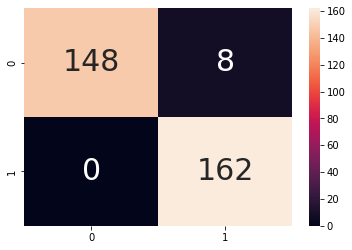

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d",annot_kws={'size': 30})
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
y_pred = svc_model .predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[141  15]
 [  0 162]]
Accuracy: 0.9528301886792453
Precision: 0.9152542372881356
Recall: 1.0
TPR:  1.0
FPR:  0.09615384615384616
F1 Score: 0.9557522123893806


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[152   4]
 [  0 162]]
Accuracy: 0.9874213836477987
Precision: 0.9759036144578314
Recall: 1.0
TPR:  1.0
FPR:  0.02564102564102564
F1 Score: 0.9878048780487805


Credit
-----------------

In [ ]:
df=pd.read_csv("drive/MyDrive/Modified_Datasets/IQROutlier_Classification/credit.csv")
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,outlier
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,0


In [ ]:
# categ=['A1','A4','A5','A6','A7','A9','A10','A12','A13']
# cont=['A2','A3','A8','A11','A14','A15']
# df = MissingValuesHandler(df, categ, cont)

In [ ]:
df1 = df.copy()
str_ar = ['A9','A10','A12','A13']
df1 = MapFunc(df1, str_ar)
str_ar = ['A1','A4','A5','A6','A7']
for i in range(len(str_ar)):
    uni = list(df1[str_ar[i]].unique())
    uni.remove('?')
    mylist = range(0,len(uni))
    d = dict(zip(uni,mylist))
    d['?'] = np.nan
    print(d)
    print('-------------------------')
    df1[str_ar[i]] = [d[item] for item in df1[str_ar[i]]]
    df1[str_ar[i]] = df1[str_ar[i]].replace('?',np.nan)

for i in range(len(df1.columns)):
  df1[df1.columns[i]] = df1[df1.columns[i]].replace('?',np.nan)

df1.head()

{'b': 0, 'a': 1, '?': nan}
-------------------------
{'u': 0, 'y': 1, 'l': 2, '?': nan}
-------------------------
{'g': 0, 'p': 1, 'gg': 2, '?': nan}
-------------------------
{'w': 0, 'q': 1, 'm': 2, 'r': 3, 'cc': 4, 'k': 5, 'c': 6, 'd': 7, 'x': 8, 'i': 9, 'e': 10, 'aa': 11, 'ff': 12, 'j': 13, '?': nan}
-------------------------
{'v': 0, 'h': 1, 'bb': 2, 'ff': 3, 'j': 4, 'z': 5, 'o': 6, 'dd': 7, 'n': 8, '?': nan}
-------------------------


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,outlier
0,0.0,30.83,0.000,0.0,0.0,0.0,0.0,1.25,0,0,1,0,0,00202,0,0
1,1.0,58.67,4.460,0.0,0.0,1.0,1.0,3.04,0,0,6,0,0,00043,560,0
2,1.0,24.50,0.500,0.0,0.0,1.0,1.0,1.50,0,1,0,0,0,00280,824,0
3,0.0,27.83,1.540,0.0,0.0,0.0,0.0,3.75,0,0,5,1,0,00100,3,0
4,0.0,20.17,5.625,0.0,0.0,0.0,0.0,1.71,0,1,0,0,1,00120,0,0


In [ ]:
imputer = KNNImputer(n_neighbors=3)
dataset = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

In [ ]:
categ=['A1','A4','A5','A6','A7','A9','A10','A12','A13']
for i in range(len(categ)):
    one_hot = pd.get_dummies(dataset[categ[i]])
    names = dataset[categ[i]].unique()
    temp = []
    for j in range(len(names)):
      temp.append(categ[i] +'_'+ str(names[j]))
    print(temp)
    one_hot.columns = temp
    dataset = dataset.drop(categ[i],axis = 1)
    dataset= dataset.join(one_hot)
print(dataset.head())

['A1_0.0', 'A1_1.0', 'A1_0.6666666666666666', 'A1_0.3333333333333333']
['A4_0.0', 'A4_1.0', 'A4_0.3333333333333333', 'A4_2.0']
['A5_0.0', 'A5_1.0', 'A5_0.3333333333333333', 'A5_2.0']
['A6_0.0', 'A6_1.0', 'A6_2.0', 'A6_3.0', 'A6_4.0', 'A6_5.0', 'A6_6.0', 'A6_7.0', 'A6_8.0', 'A6_9.0', 'A6_10.0', 'A6_11.0', 'A6_12.0', 'A6_13.0', 'A6_7.333333333333333', 'A6_4.666666666666667', 'A6_8.333333333333334', 'A6_1.6666666666666667']
['A7_0.0', 'A7_1.0', 'A7_2.0', 'A7_3.0', 'A7_4.0', 'A7_5.0', 'A7_0.6666666666666666', 'A7_6.0', 'A7_7.0', 'A7_8.0', 'A7_1.6666666666666667']
['A9_0.0', 'A9_1.0']
['A10_0.0', 'A10_1.0']
['A12_0.0', 'A12_1.0']
['A13_0.0', 'A13_1.0', 'A13_2.0']
      A2     A3    A8  A11    A14    A15  outlier  A1_0.0  A1_1.0  \
0  30.83  0.000  1.25  1.0  202.0    0.0      0.0       1       0   
1  58.67  4.460  3.04  6.0   43.0  560.0      0.0       0       0   
2  24.50  0.500  1.50  0.0  280.0  824.0      0.0       0       0   
3  27.83  1.540  3.75  5.0  100.0    3.0      0.0       1

In [ ]:
df = dataset.copy()
msk = df['outlier'] == 1
num_to_oversample = len(df) - 2*msk.sum()
df_positive_oversample = df[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_train_oversample = pd.concat([df, df_positive_oversample])
df_train_oversample['outlier'].value_counts()

0.0    667
1.0    667
Name: outlier, dtype: int64

In [ ]:
X_train, X_test = train_test_split(df_train_oversample, test_size = 0.3, random_state = 0)
y_train = X_train['outlier']
X_train = X_train.drop('outlier',1)
y_test = X_test['outlier']
X_test = X_test.drop('outlier',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


Confusion Matrix:
[[193   7]
 [  0 201]]
Accuracy: 0.9825436408977556
Precision: 0.9663461538461539
Recall: 1.0
TPR:  1.0
FPR:  0.035
F1 Score: 0.9828850855745722


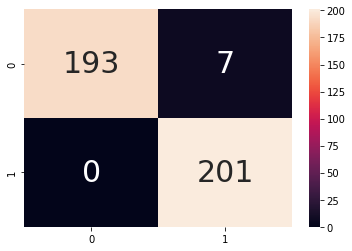

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d",annot_kws={'size': 30})
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
y_pred = svc_model .predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[192   8]
 [ 15 186]]
Accuracy: 0.942643391521197
Precision: 0.9587628865979382
Recall: 0.9253731343283582
TPR:  0.9253731343283582
FPR:  0.04
F1 Score: 0.9417721518987341


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[187  13]
 [ 15 186]]
Accuracy: 0.9301745635910225
Precision: 0.9346733668341709
Recall: 0.9253731343283582
TPR:  0.9253731343283582
FPR:  0.065
F1 Score: 0.93


German
-----------------

In [ ]:
df=pd.read_csv("drive/MyDrive/Datasets/IQROutlier_Classification/german.csv")
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,outlier
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


In [ ]:
categ=['A1','A3','A4','A6','A7','A9','A10','A12','A14','A15','A17','A19','A20']
df = oneHotFunc(df, categ)

   A2    A5  A8  A11  A13  A16  A18  outlier  A1_A11  A1_A12  ...  A15_A153  \
0   6  1169   4    4   67    2    1        0       1       0  ...         1   
1  48  5951   2    2   22    1    1        0       0       1  ...         1   
2  12  2096   2    3   49    1    2        0       0       0  ...         1   
3  42  7882   2    4   45    1    2        0       1       0  ...         0   
4  24  4870   3    4   53    2    2        0       1       0  ...         0   

   A15_A151  A17_A173  A17_A172  A17_A174  A17_A171  A19_A192  A19_A191  \
0         0         0         0         1         0         0         1   
1         0         0         0         1         0         1         0   
2         0         0         1         0         0         1         0   
3         1         0         0         1         0         1         0   
4         1         0         0         1         0         1         0   

   A20_A201  A20_A202  
0         1         0  
1         1         0  
2 

In [ ]:
msk = df['outlier'] == 1
num_to_oversample = len(df) - 2*msk.sum()
df_positive_oversample = df[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_train_oversample = pd.concat([df, df_positive_oversample])
df_train_oversample['outlier'].value_counts()

0    995
1    995
Name: outlier, dtype: int64

In [ ]:
X_train, X_test = train_test_split(df_train_oversample, test_size = 0.3, random_state = 0)
y_train = X_train['outlier']
X_train = X_train.drop('outlier',1)
y_test = X_test['outlier']
X_test = X_test.drop('outlier',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[307   6]
 [  0 284]]
Accuracy: 0.9899497487437185
Precision: 0.9793103448275862
Recall: 1.0
TPR:  1.0
FPR:  0.019169329073482427
F1 Score: 0.9895470383275261


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
y_pred = svc_model .predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[308   5]
 [  0 284]]
Accuracy: 0.9916247906197655
Precision: 0.9826989619377162
Recall: 1.0
TPR:  1.0
FPR:  0.01597444089456869
F1 Score: 0.9912739965095986


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[306   7]
 [  0 284]]
Accuracy: 0.9882747068676717
Precision: 0.9759450171821306
Recall: 1.0
TPR:  1.0
FPR:  0.022364217252396165
F1 Score: 0.9878260869565216


Heart
--------------

In [ ]:
df=pd.read_csv("drive/MyDrive/Datasets/IQROutlier_Classification/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outlier
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [ ]:
categ = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
df = oneHotFunc(df, categ)

   age  trestbps  chol  thalach  oldpeak  outlier  sex_1  sex_0  cp_3  cp_2  \
0   63       145   233      150      2.3        0      0      1     0     0   
1   37       130   250      187      3.5        0      0      1     0     0   
2   41       130   204      172      1.4        0      1      0     0     1   
3   56       120   236      178      0.8        0      0      1     0     1   
4   57       120   354      163      0.6        0      1      0     1     0   

   ...  slope_1  ca_0  ca_2  ca_1  ca_3  ca_4  thal_1  thal_2  thal_3  thal_0  
0  ...        0     1     0     0     0     0       0       1       0       0  
1  ...        0     1     0     0     0     0       0       0       1       0  
2  ...        1     1     0     0     0     0       0       0       1       0  
3  ...        1     1     0     0     0     0       0       0       1       0  
4  ...        1     1     0     0     0     0       0       0       1       0  

[5 rows x 31 columns]


In [ ]:
msk = df['outlier'] == 1
num_to_oversample = len(df) - 2*msk.sum()
df_positive_oversample = df[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_train_oversample = pd.concat([df, df_positive_oversample])
df_train_oversample['outlier'].value_counts()

0    296
1    296
Name: outlier, dtype: int64

In [ ]:
X_train, X_test = train_test_split(df_train_oversample, test_size = 0.3, random_state = 0)
y_train = X_train['outlier']
X_train = X_train.drop('outlier',1)
y_test = X_test['outlier']
X_test = X_test.drop('outlier',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[84  2]
 [ 0 92]]
Accuracy: 0.9887640449438202
Precision: 0.9787234042553191
Recall: 1.0
TPR:  1.0
FPR:  0.023255813953488372
F1 Score: 0.989247311827957


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
y_pred = svc_model .predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[78  8]
 [ 0 92]]
Accuracy: 0.9550561797752809
Precision: 0.92
Recall: 1.0
TPR:  1.0
FPR:  0.09302325581395349
F1 Score: 0.9583333333333334


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[77  9]
 [ 0 92]]
Accuracy: 0.949438202247191
Precision: 0.9108910891089109
Recall: 1.0
TPR:  1.0
FPR:  0.10465116279069768
F1 Score: 0.9533678756476685


Australian
-----------------

In [ ]:
df=pd.read_csv("drive/MyDrive/Datasets/IQROutlier_Classification/australian.csv")
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,outlier
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,0


In [ ]:
categ = ['A1','A4','A5','A6','A8','A9','A11','A12']
df = oneHotFunc(df, categ)

      A2     A3     A7  A10  A13   A14  outlier  A1_1  A1_0  A4_2  ...  A6_7  \
0  22.08  11.46  1.585    0  100  1213        0     0     1     0  ...     0   
1  22.67   7.00  0.165    0  160     1        0     1     0     0  ...     0   
2  29.58   1.75  1.250    0  280     1        0     1     0     1  ...     0   
3  21.67  11.50  0.000   11    0     1        0     1     0     1  ...     0   
4  20.17   8.17  1.960   14   60   159        0     0     1     0  ...     0   

   A8_0  A8_1  A9_0  A9_1  A11_1  A11_0  A12_2  A12_1  A12_3  
0     1     0     1     0      0      1      0      1      0  
1     1     0     1     0      1      0      0      1      0  
2     1     0     1     0      0      1      0      1      0  
3     0     1     0     1      0      1      0      1      0  
4     0     1     0     1      1      0      0      1      0  

[5 rows x 43 columns]


In [ ]:
msk = df['outlier'] == 1
num_to_oversample = len(df) - 2*msk.sum()
df_positive_oversample = df[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_train_oversample = pd.concat([df, df_positive_oversample])
df_train_oversample['outlier'].value_counts()

0    659
1    659
Name: outlier, dtype: int64

In [ ]:
X_train, X_test = train_test_split(df_train_oversample, test_size = 0.3, random_state = 0)
y_train = X_train['outlier']
X_train = X_train.drop('outlier',1)
y_test = X_test['outlier']
X_test = X_test.drop('outlier',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[183   8]
 [  0 205]]
Accuracy: 0.9797979797979798
Precision: 0.9624413145539906
Recall: 1.0
TPR:  1.0
FPR:  0.041884816753926704
F1 Score: 0.9808612440191388


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
y_pred = svc_model .predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[183   8]
 [  0 205]]
Accuracy: 0.9797979797979798
Precision: 0.9624413145539906
Recall: 1.0
TPR:  1.0
FPR:  0.041884816753926704
F1 Score: 0.9808612440191388


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Confusion Matrix:
[[183   8]
 [  0 205]]
Accuracy: 0.9797979797979798
Precision: 0.9624413145539906
Recall: 1.0
TPR:  1.0
FPR:  0.041884816753926704
F1 Score: 0.9808612440191388


Classification before and after removal of outliers
---------------------------------------------------------
using random forest


Cylinder Bands
--------------

In [ ]:
df_after=pd.read_csv("drive/MyDrive/Modified_Datasets/IQRAfterRemovingOutliers/band.csv")
colnames = ['timestamp', 'cylinder_number', 'customer', 'job_number', 'grain_screened', 'ink_color',
'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type',
'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank',
'proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humifity', 'roughness', 'blade_pressure', 'varnish_pct',
'press_speed', 'ink_pct', 'solvent_pct', 'ESA_Voltage', 'ESA_Amperage', 'wax', 'hardener', 'roller_durometer',
'current_density', 'anode_space_ratio', 'chrome_content', 'target']
df_before = pd.read_csv("drive/MyDrive/Datasets/bands.data",names=colnames, header=None)

In [ ]:
# categ = ['cylinder_number', 'customer', 'job_number', 'grain_screened', 'ink_color',
# 'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type',
# 'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank']
# cont = ['proof_cut', 'viscosity', 'caliper', 'ink_temperature', 'humifity', 'roughness', 'blade_pressure', 'varnish_pct',
# 'press_speed', 'ink_pct', 'solvent_pct', 'ESA_Voltage', 'ESA_Amperage', 'wax', 'hardener', 'roller_durometer',
# 'current_density', 'anode_space_ratio', 'chrome_content']
# df_before = MissingValuesHandler(df_before, categ, cont)
# df_after = MissingValuesHandler(df_after, categ, cont)

In [ ]:
str_ar = ['cylinder_number', 'customer', 'job_number', 'ink_color', 'cylinder_division', 'paper_type', 'ink_type',
          'press_type', 'press', 'unit_number','target']
df_before = MapFunc(df_before, str_ar)
df_before = df_before.drop('timestamp',1)
df_after = MapFunc(df_after, str_ar)
df_after = df_after.drop('timestamp',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
str_ar = ['grain_screened', 'proof_on_ctd_ink', 'blade_mfg', 'direct_steam', 'solvent_type',
'type_on_cylinder', 'cylinder_size', 'paper_mill_location', 'plating_tank']
for i in range(len(str_ar)):
    uni = list(df_before[str_ar[i]].unique())
    uni.remove('?')
    mylist = range(0,len(uni))
    d = dict(zip(uni,mylist))
    d['?'] = np.nan
    print(d)
    print('-------------------------')
    df_before[str_ar[i]] = [d[item] for item in df_before[str_ar[i]]]
    df_before[str_ar[i]] = df_before[str_ar[i]].replace('?',np.nan)
for i in range(len(df_before.columns)):
  df_before[df_before.columns[i]] = df_before[df_before.columns[i]].replace('?',np.nan)

df_before.head()

{'YES': 0, 'NO': 1, '?': nan}
-------------------------
{'YES': 0, 'NO': 1, '?': nan}
-------------------------
{'BENTON': 0, 'UDDEHOLM': 1, '?': nan}
-------------------------
{'NO': 0, 'YES': 1, 'no': 2, '?': nan}
-------------------------
{'LINE': 0, 'XYLOL': 1, 'NAPTHA': 2, '?': nan}
-------------------------
{'YES': 0, 'NO': 1, 'no': 2, 'yes': 3, '?': nan}
-------------------------
{'TABLOID': 0, 'CATALOG': 1, 'SPIEGEL': 2, 'catalog': 3, 'tabloid': 4, 'spiegel': 5, '?': nan}
-------------------------
{'NorthUS': 0, 'CANADIAN': 1, 'CANAdiAN': 2, 'SCANDANAVIAN': 3, 'SouthUS': 4, 'mideuropean': 5, '?': nan}
-------------------------
{'1911': 0, '1910': 1, '?': nan}
-------------------------


,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,target
0,0,0,0,0.0,0,0.0,0.0,0,0,0,...,36.4,0,0,2.5,1,34,40,105,100,0
1,1,0,0,0.0,0,0.0,0.0,0,0,0,...,38.5,0,0,2.5,0.7,34,40,105,100,1
2,2,1,1,0.0,0,0.0,0.0,0,0,1,...,39.8,0,0,2.8,0.9,40,40,103.87,100,1
3,3,2,2,0.0,0,0.0,0.0,0,0,0,...,38.8,0,0,2.5,1.3,40,40,108.06,100,1
4,4,3,3,1.0,0,0.0,0.0,0,0,1,...,42.5,5,0,2.3,0.6,35,40,106.67,100,1


In [ ]:
str_ar = ['grain_screened', 'proof_on_ctd_ink', 'blade_mfg', 'direct_steam', 'solvent_type',
'type_on_cylinder', 'cylinder_size', 'paper_mill_location', 'plating_tank']
for i in range(len(str_ar)):
    uni = list(df_after[str_ar[i]].unique())
    uni.remove('?')
    mylist = range(0,len(uni))
    d = dict(zip(uni,mylist))
    d['?'] = np.nan
    print(d)
    print('-------------------------')
    df_after[str_ar[i]] = [d[item] for item in df_after[str_ar[i]]]
    df_after[str_ar[i]] = df_after[str_ar[i]].replace('?',np.nan)
for i in range(len(df_after.columns)):
  df_after[df_after.columns[i]] = df_after[df_after.columns[i]].replace('?',np.nan)

df_after.head()

{'YES': 0, 'NO': 1, '?': nan}
-------------------------
{'YES': 0, 'NO': 1, '?': nan}
-------------------------
{'BENTON': 0, 'UDDEHOLM': 1, '?': nan}
-------------------------
{'NO': 0, 'YES': 1, 'no': 2, '?': nan}
-------------------------
{'LINE': 0, 'XYLOL': 1, 'NAPTHA': 2, '?': nan}
-------------------------
{'YES': 0, 'NO': 1, 'no': 2, 'yes': 3, '?': nan}
-------------------------
{'TABLOID': 0, 'CATALOG': 1, 'SPIEGEL': 2, 'catalog': 3, 'tabloid': 4, 'spiegel': 5, '?': nan}
-------------------------
{'NorthUS': 0, 'CANADIAN': 1, 'CANAdiAN': 2, 'SCANDANAVIAN': 3, 'SouthUS': 4, 'mideuropean': 5, '?': nan}
-------------------------
{'1911': 0, '1910': 1, '?': nan}
-------------------------


,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,...,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,target
0,0,0,0,0.0,0,0.0,0.0,0,0,0,...,36.4,0,0,2.5,1,34,40,105,100,0
1,1,0,0,0.0,0,0.0,0.0,0,0,0,...,38.5,0,0,2.5,0.7,34,40,105,100,1
2,2,1,1,0.0,0,0.0,0.0,0,0,1,...,39.8,0,0,2.8,0.9,40,40,103.87,100,1
3,3,2,2,0.0,0,0.0,0.0,0,0,0,...,38.8,0,0,2.5,1.3,40,40,108.06,100,1
4,4,3,3,1.0,0,0.0,0.0,0,0,1,...,42.5,5,0,2.3,0.6,35,40,106.67,100,1


In [ ]:
df_before = df_before.astype(float)
df_after = df_after.astype(float)

In [ ]:
imputer = KNNImputer(n_neighbors=3)
df_before = pd.DataFrame(imputer.fit_transform(df_before),columns = df_before.columns)
imputer = KNNImputer(n_neighbors=3)
df_after = pd.DataFrame(imputer.fit_transform(df_after),columns = df_after.columns)

In [ ]:
categ = ['cylinder_number', 'customer', 'job_number', 'grain_screened', 'ink_color',
'proof_on_ctd_ink', 'blade_mfg', 'cylinder_division', 'paper_type', 'ink_type', 'direct_steam', 'solvent_type',
'type_on_cylinder', 'press_type', 'press', 'unit_number', 'cylinder_size', 'paper_mill_location', 'plating_tank']
for i in range(len(categ)):
    one_hot = pd.get_dummies(df_before[categ[i]])
    names = df_before[categ[i]].unique()
    temp = []
    for j in range(len(names)):
      temp.append(categ[i] +'_'+ str(names[j]))
    print(temp)
    one_hot.columns = temp
    df_before = df_before.drop(categ[i],axis = 1)
    df_before= df_before.join(one_hot)

for i in range(len(categ)):
    one_hot = pd.get_dummies(df_after[categ[i]])
    names = df_after[categ[i]].unique()
    temp = []
    for j in range(len(names)):
      temp.append(categ[i] +'_'+ str(names[j]))
    one_hot.columns = temp
    df_after = df_after.drop(categ[i],axis = 1)
    df_after= df_after.join(one_hot)

['cylinder_number_0.0', 'cylinder_number_1.0', 'cylinder_number_2.0', 'cylinder_number_3.0', 'cylinder_number_4.0', 'cylinder_number_5.0', 'cylinder_number_6.0', 'cylinder_number_7.0', 'cylinder_number_8.0', 'cylinder_number_9.0', 'cylinder_number_10.0', 'cylinder_number_11.0', 'cylinder_number_12.0', 'cylinder_number_13.0', 'cylinder_number_14.0', 'cylinder_number_15.0', 'cylinder_number_16.0', 'cylinder_number_17.0', 'cylinder_number_18.0', 'cylinder_number_19.0', 'cylinder_number_20.0', 'cylinder_number_21.0', 'cylinder_number_22.0', 'cylinder_number_23.0', 'cylinder_number_24.0', 'cylinder_number_25.0', 'cylinder_number_26.0', 'cylinder_number_27.0', 'cylinder_number_28.0', 'cylinder_number_29.0', 'cylinder_number_30.0', 'cylinder_number_31.0', 'cylinder_number_32.0', 'cylinder_number_33.0', 'cylinder_number_34.0', 'cylinder_number_35.0', 'cylinder_number_36.0', 'cylinder_number_37.0', 'cylinder_number_38.0', 'cylinder_number_39.0', 'cylinder_number_40.0', 'cylinder_number_41.0', '

In [ ]:
X = df_before.drop('target',1)
y = df_before['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
clf=RandomForestClassifier(n_estimators=100,random_state=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d",annot_kws={'size': 30})
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Confusion Matrix:
[[41 24]
 [10 87]]
Accuracy: 0.7901234567901234
Precision: 0.7837837837837838
Recall: 0.8969072164948454
TPR:  0.8969072164948454
FPR:  0.36923076923076925
F1 Score: 0.8365384615384617


In [ ]:
X = df_after.drop('target',1)
y = df_after['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
clf=RandomForestClassifier(n_estimators=100,random_state=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Confusion Matrix:
[[37 24]
 [ 8 90]]
Accuracy: 0.7987421383647799
Precision: 0.7894736842105263
Recall: 0.9183673469387755
TPR:  0.9183673469387755
FPR:  0.39344262295081966
F1 Score: 0.8490566037735849


Credit
-------------

In [ ]:
df_after=pd.read_csv("drive/MyDrive/Modified_Datasets/IQRAfterRemovingOutliers/credit.csv")
colnames = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','target']
df_before = pd.read_csv("drive/MyDrive/Datasets/creditapproval.data",names=colnames, header=None)

In [ ]:
str_ar = ['A9','A10','A12','A13', 'target']
df_before = MapFunc(df_before, str_ar)
str_ar = ['A1','A4','A5','A6','A7']
for i in range(len(str_ar)):
    uni = list(df_before[str_ar[i]].unique())
    uni.remove('?')
    mylist = range(0,len(uni))
    d = dict(zip(uni,mylist))
    d['?'] = np.nan
    print(d)
    print('-------------------------')
    df_before[str_ar[i]] = [d[item] for item in df_before[str_ar[i]]]
    df_before[str_ar[i]] = df_before[str_ar[i]].replace('?',np.nan)

for i in range(len(df_before.columns)):
  df_before[df_before.columns[i]] = df_before[df_before.columns[i]].replace('?',np.nan)

imputer = KNNImputer(n_neighbors=3)
df_before = pd.DataFrame(imputer.fit_transform(df_before),columns = df_before.columns)

{'b': 0, 'a': 1, '?': nan}
-------------------------
{'u': 0, 'y': 1, 'l': 2, '?': nan}
-------------------------
{'g': 0, 'p': 1, 'gg': 2, '?': nan}
-------------------------
{'w': 0, 'q': 1, 'm': 2, 'r': 3, 'cc': 4, 'k': 5, 'c': 6, 'd': 7, 'x': 8, 'i': 9, 'e': 10, 'aa': 11, 'ff': 12, 'j': 13, '?': nan}
-------------------------
{'v': 0, 'h': 1, 'bb': 2, 'ff': 3, 'j': 4, 'z': 5, 'o': 6, 'dd': 7, 'n': 8, '?': nan}
-------------------------


In [ ]:
str_ar = ['A9','A10','A12','A13', 'target']
df_after = MapFunc(df_after, str_ar)
str_ar = ['A1','A4','A5','A6','A7']
for i in range(len(str_ar)):
    uni = list(df_after[str_ar[i]].unique())
    uni.remove('?')
    mylist = range(0,len(uni))
    d = dict(zip(uni,mylist))
    d['?'] = np.nan
    print(d)
    print('-------------------------')
    df_after[str_ar[i]] = [d[item] for item in df_after[str_ar[i]]]
    df_after[str_ar[i]] = df_after[str_ar[i]].replace('?',np.nan)

for i in range(len(df_after.columns)):
  df_after[df_after.columns[i]] = df_after[df_after.columns[i]].replace('?',np.nan)

df_after.head()
imputer = KNNImputer(n_neighbors=3)
df_after = pd.DataFrame(imputer.fit_transform(df_after),columns = df_after.columns)

{'b': 0, 'a': 1, '?': nan}
-------------------------
{'u': 0, 'y': 1, 'l': 2, '?': nan}
-------------------------
{'g': 0, 'p': 1, 'gg': 2, '?': nan}
-------------------------
{'w': 0, 'q': 1, 'm': 2, 'r': 3, 'cc': 4, 'k': 5, 'c': 6, 'd': 7, 'x': 8, 'i': 9, 'e': 10, 'aa': 11, 'ff': 12, 'j': 13, '?': nan}
-------------------------
{'v': 0, 'h': 1, 'bb': 2, 'ff': 3, 'j': 4, 'z': 5, 'o': 6, 'dd': 7, 'n': 8, '?': nan}
-------------------------


In [ ]:
# categ=['A1','A4','A5','A6','A7','A9','A10','A12','A13']
# cont=['A2','A3','A8','A11','A14','A15']
# df_before = MissingValuesHandler(df_before, categ, cont)
# df_after = MissingValuesHandler(df_after, categ, cont)

In [ ]:
categ=['A1','A4','A5','A6','A7','A9','A10','A12','A13']
for i in range(len(categ)):
    one_hot = pd.get_dummies(df_before[categ[i]])
    names = df_before[categ[i]].unique()
    temp = []
    for j in range(len(names)):
      temp.append(categ[i] +'_'+ str(names[j]))
    print(temp)
    one_hot.columns = temp
    df_before = df_before.drop(categ[i],axis = 1)
    df_before = df_before.join(one_hot)
# print(df_before.head())

['A1_0.0', 'A1_1.0', 'A1_0.6666666666666666', 'A1_0.3333333333333333']
['A4_0.0', 'A4_1.0', 'A4_0.3333333333333333', 'A4_2.0']
['A5_0.0', 'A5_1.0', 'A5_0.3333333333333333', 'A5_2.0']
['A6_0.0', 'A6_1.0', 'A6_2.0', 'A6_3.0', 'A6_4.0', 'A6_5.0', 'A6_6.0', 'A6_7.0', 'A6_8.0', 'A6_9.0', 'A6_10.0', 'A6_11.0', 'A6_12.0', 'A6_13.0', 'A6_7.333333333333333', 'A6_4.666666666666667', 'A6_8.333333333333334', 'A6_3.3333333333333335', 'A6_6.333333333333333']
['A7_0.0', 'A7_1.0', 'A7_2.0', 'A7_3.0', 'A7_4.0', 'A7_5.0', 'A7_0.6666666666666666', 'A7_6.0', 'A7_7.0', 'A7_8.0', 'A7_1.6666666666666667']
['A9_0.0', 'A9_1.0']
['A10_0.0', 'A10_1.0']
['A12_0.0', 'A12_1.0']
['A13_0.0', 'A13_1.0', 'A13_2.0']


In [ ]:
categ=['A1','A4','A5','A6','A7','A9','A10','A12','A13']
for i in range(len(categ)):
    one_hot = pd.get_dummies(df_after[categ[i]])
    names = df_after[categ[i]].unique()
    temp = []
    for j in range(len(names)):
      temp.append(categ[i] +'_'+ str(names[j]))
    print(temp)
    one_hot.columns = temp
    df_after = df_after.drop(categ[i],axis = 1)
    df_after = df_after.join(one_hot)
# print(df_after.head())

['A1_0.0', 'A1_1.0', 'A1_0.6666666666666666', 'A1_0.3333333333333333']
['A4_0.0', 'A4_1.0', 'A4_0.3333333333333333', 'A4_2.0']
['A5_0.0', 'A5_1.0', 'A5_0.3333333333333333', 'A5_2.0']
['A6_0.0', 'A6_1.0', 'A6_2.0', 'A6_3.0', 'A6_4.0', 'A6_5.0', 'A6_6.0', 'A6_7.0', 'A6_8.0', 'A6_9.0', 'A6_10.0', 'A6_11.0', 'A6_12.0', 'A6_13.0', 'A6_7.333333333333333', 'A6_4.666666666666667', 'A6_6.333333333333333', 'A6_3.3333333333333335']
['A7_0.0', 'A7_1.0', 'A7_2.0', 'A7_3.0', 'A7_4.0', 'A7_5.0', 'A7_0.6666666666666666', 'A7_6.0', 'A7_7.0', 'A7_8.0', 'A7_1.6666666666666667']
['A9_0.0', 'A9_1.0']
['A10_0.0', 'A10_1.0']
['A12_0.0', 'A12_1.0']
['A13_0.0', 'A13_1.0', 'A13_2.0']


In [ ]:
# df_before = oneHotFunc(df_before, categ)
# df_after = oneHotFunc(df_after, categ)

In [ ]:
# map = { '+':0, '-':1}
# df_before.target = [map[item] for item in df_before.target]
# df_after.target = [map[item] for item in df_after.target]
df_before = df_before.astype(float)
df_after = df_after.astype(float)

In [ ]:
X = df_before.drop('target',1)
y = df_before['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
clf=RandomForestClassifier(n_estimators=100,random_state=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Confusion Matrix:
[[76 14]
 [18 99]]
Accuracy: 0.8454106280193237
Precision: 0.8761061946902655
Recall: 0.8461538461538461
TPR:  0.8461538461538461
FPR:  0.15555555555555556
F1 Score: 0.8608695652173913


In [ ]:
X = df_after.drop('target',1)
y = df_after['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
clf=RandomForestClassifier(n_estimators=100,random_state=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Confusion Matrix:
[[ 72  13]
 [ 11 105]]
Accuracy: 0.8805970149253731
Precision: 0.8898305084745762
Recall: 0.9051724137931034
TPR:  0.9051724137931034
FPR:  0.15294117647058825
F1 Score: 0.8974358974358974


German
-------------

In [ ]:
df_after=pd.read_csv("drive/MyDrive/Datasets/IQRAfterRemovingOutliers/german.csv")
colnames = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18','A19','A20','target']
df_before = pd.read_csv("drive/MyDrive/Datasets/german.data",delimiter=' ',names=colnames, header=None)

In [ ]:
categ=['A1','A3','A4','A6','A7','A9','A10','A12','A14','A15','A17','A19','A20']
df_before = oneHotFunc(df_before, categ)
df_after = oneHotFunc(df_after, categ)

   A2    A5  A8  A11  A13  A16  A18  target  A1_A11  A1_A12  ...  A15_A153  \
0   6  1169   4    4   67    2    1       1       1       0  ...         1   
1  48  5951   2    2   22    1    1       2       0       1  ...         1   
2  12  2096   2    3   49    1    2       1       0       0  ...         1   
3  42  7882   2    4   45    1    2       1       1       0  ...         0   
4  24  4870   3    4   53    2    2       2       1       0  ...         0   

   A15_A151  A17_A173  A17_A172  A17_A174  A17_A171  A19_A192  A19_A191  \
0         0         0         0         1         0         0         1   
1         0         0         0         1         0         1         0   
2         0         0         1         0         0         1         0   
3         1         0         0         1         0         1         0   
4         1         0         0         1         0         1         0   

   A20_A201  A20_A202  
0         1         0  
1         1         0  
2       

In [ ]:
X = df_before.drop('target',1)
y = df_before['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=5)
clf=RandomForestClassifier(n_estimators=100,random_state=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Confusion Matrix:
[[195  23]
 [ 50  32]]
Accuracy: 0.7566666666666667
Precision: 0.7959183673469388
Recall: 0.8944954128440367
TPR:  0.3902439024390244
FPR:  0.10550458715596331
F1 Score: 0.8423326133909287


In [ ]:
X = df_after.drop('target',1)
y = df_after['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=105)
clf=RandomForestClassifier(n_estimators=100,random_state=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Confusion Matrix:
[[201  12]
 [ 51  35]]
Accuracy: 0.7892976588628763
Precision: 0.7976190476190477
Recall: 0.9436619718309859
TPR:  0.4069767441860465
FPR:  0.056338028169014086
F1 Score: 0.8645161290322582


Heart
-------------

In [ ]:
df_after=pd.read_csv("drive/MyDrive/Datasets/IQRAfterRemovingOutliers/heart.csv")
df_before = pd.read_csv("drive/MyDrive/Datasets/heart.csv")

In [ ]:
categ = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
df_after = oneHotFunc(df_after, categ)
df_before = oneHotFunc(df_before, categ)

   age  trestbps  chol  thalach  oldpeak  target  sex_1  sex_0  cp_3  cp_2  \
0   63       145   233      150      2.3       1      0      1     0     0   
1   37       130   250      187      3.5       1      0      1     0     0   
2   41       130   204      172      1.4       1      1      0     0     1   
3   56       120   236      178      0.8       1      0      1     0     1   
4   57       120   354      163      0.6       1      1      0     1     0   

   ...  slope_1  ca_0  ca_2  ca_1  ca_3  ca_4  thal_1  thal_2  thal_3  thal_0  
0  ...        0     1     0     0     0     0       0       1       0       0  
1  ...        0     1     0     0     0     0       0       0       1       0  
2  ...        1     1     0     0     0     0       0       0       1       0  
3  ...        1     1     0     0     0     0       0       0       1       0  
4  ...        1     1     0     0     0     0       0       0       1       0  

[5 rows x 31 columns]
   age  trestbps  chol  thal

In [ ]:
X = df_before.drop('target',1)
y = df_before['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
clf=RandomForestClassifier(n_estimators=100,random_state=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Confusion Matrix:
[[37 13]
 [ 5 36]]
Accuracy: 0.8021978021978022
Precision: 0.7346938775510204
Recall: 0.8780487804878049
TPR:  0.8780487804878049
FPR:  0.26
F1 Score: 0.8


In [ ]:
X = df_after.drop('target',1)
y = df_after['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
clf=RandomForestClassifier(n_estimators=100,random_state=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Confusion Matrix:
[[33 10]
 [ 4 42]]
Accuracy: 0.8426966292134831
Precision: 0.8076923076923077
Recall: 0.9130434782608695
TPR:  0.9130434782608695
FPR:  0.23255813953488372
F1 Score: 0.8571428571428572


Australian
-------------

In [ ]:
df_after=pd.read_csv("drive/MyDrive/Datasets/IQRAfterRemovingOutliers/australian.csv")
colnames = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','target']
df_before = pd.read_csv("drive/MyDrive/Datasets/australian.dat",delimiter=' ',names=colnames, header=None)

In [ ]:
categ = ['A1','A4','A5','A6','A8','A9','A11','A12']
df_after = oneHotFunc(df_after, categ)
df_before = oneHotFunc(df_before, categ)

      A2     A3     A7  A10  A13   A14  target  A1_1  A1_0  A4_2  ...  A6_9  \
0  22.08  11.46  1.585    0  100  1213       0     0     1     0  ...     0   
1  22.67   7.00  0.165    0  160     1       0     1     0     0  ...     0   
2  29.58   1.75  1.250    0  280     1       0     1     0     1  ...     0   
3  21.67  11.50  0.000   11    0     1       1     1     0     1  ...     0   
4  20.17   8.17  1.960   14   60   159       1     0     1     0  ...     0   

   A8_0  A8_1  A9_0  A9_1  A11_1  A11_0  A12_2  A12_1  A12_3  
0     1     0     1     0      0      1      0      1      0  
1     1     0     1     0      1      0      0      1      0  
2     1     0     1     0      0      1      0      1      0  
3     0     1     0     1      0      1      0      1      0  
4     0     1     0     1      1      0      0      1      0  

[5 rows x 43 columns]
      A2     A3     A7  A10  A13   A14  target  A1_1  A1_0  A4_2  ...  A6_7  \
0  22.08  11.46  1.585    0  100  1213       

In [ ]:
X = df_before.drop('target',1)
y = df_before['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
clf=RandomForestClassifier(n_estimators=100,random_state=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Confusion Matrix:
[[105  17]
 [ 11  74]]
Accuracy: 0.8647342995169082
Precision: 0.8131868131868132
Recall: 0.8705882352941177
TPR:  0.8705882352941177
FPR:  0.13934426229508196
F1 Score: 0.8409090909090909


In [ ]:
X = df_before.drop('target',1)
y = df_before['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)
clf=RandomForestClassifier(n_estimators=100,random_state=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("TPR: ",tp/(tp+fn))
print("FPR: ",fp/(tn+fp))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Confusion Matrix:
[[100  15]
 [  8  84]]
Accuracy: 0.8888888888888888
Precision: 0.8484848484848485
Recall: 0.9130434782608695
TPR:  0.9130434782608695
FPR:  0.13043478260869565
F1 Score: 0.8795811518324607
